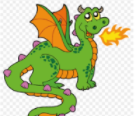

In [1]:
import random
from IPython.display import Image 
import numpy as np
pil_img = Image(filename='cute_dragon.png')
display(pil_img)

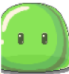

In [2]:
display(Image(filename='cute_slime.png'))

In [3]:
round_one_stack.resolve()

NameError: name 'round_one_stack' is not defined

## N.S.: looks like it's still checking for damage for an empty array

solution: make a test case for empty arrays and skip'em!

In [8]:
round_one_stack.resolve()

<class 'numpy.ndarray'>
[None None]
False
<class '__main__.CombineCard'>
Barbarian, Halve
Split damage of card before into 2 x 75% versions
True
Found a CombineCard


AttributeError: 'numpy.ndarray' object has no attribute 'set_value'

In [3]:
class Stack:
    def __init__(self, 
                 Cards: np.array,
                game_round: int,
                damage:float = 0):
        
        self.Cards = Cards
        self.game_round = game_round
        self.damage = damage

    def resolve(self):
        for i, card in enumerate(self.Cards):
            print(type(card))
            print(card)
            print(isinstance(card, CombineCard))
            if isinstance(card, CombineCard):
                print("Found a CombineCard")
                self.Cards = card.combine_with_Cards(self.Cards,i)
        for i, card in enumerate(self.Cards):
            if not isinstance(card, CombineCard):
                print("Found reggy card")
                self.get_card_damages(card)                

        return 'Round over. Damage: ' + str(self.damage)

    
    def get_card_damages(self, container):
        if isinstance(container, np.ndarray):
            for i in container:
                self.get_card_damages(i)
        else:
            self.damage += container.get_value()
        
    
    def add_Cards(self, Cards:list):
        self.Cards = np.append(self.Cards,Cards)
        
    def get_Cards(self):
        return self.Cards
    
    def __repr__(self) -> str:
        
        cards_lines = ''.join("\n-------\n" + str(card) for card in self.Cards)
        return f'Round {self.game_round} stack: {cards_lines}'

class Card:
    def __init__(self, 
                 name:str, 
                 job:str, 
                 damage:float,
                 targets:int,
                 description:str,
                 ):
        self.name = name
        self.job = job
        self.damage = damage
        self.targets = targets
        self.description = description
        
    def get_value(self):
        return self.damage
    
    def set_value(self, new_damage):
        self.damage = new_damage
        print(self.damage)
    
    def __repr__(self) -> str:
        return f'{self.job}, {self.name}\n{self.description}'
    
class CombineCard(Card):
    def __init__(self, 
                 name:str, 
                 job:str, 
                 damage:float, 
                 targets:int, 
                 description:str,
                 modify,
                 m_targets: str):

        super().__init__(name, job, damage, targets, description)
        self.modify = modify
        self.m_targets = m_targets
    
    def combine_with_Cards(self,Cards_in_stack: list, position):
        
        if self.m_targets == 'before':
            Cards_in_stack[position-1] = self.modify(Cards_in_stack[position-1])
            return Cards_in_stack
        
        if self.m_targets == 'after':
            Cards_in_stack[position+1] = self.modify(Cards_in_stack[position+1])
            return Cards_in_stack
    
    
    def __repr__(self):
        return f'{self.job}, {self.name}\n{self.description}'
    

In [4]:
axe = Card(name = "Axe",
           job = "Barbarian",
           damage = 2.0,
           targets = 2,
           description = "2dmg to two targets",)

halve = CombineCard(name = "Halve",
                    job = "Barbarian",
                    damage = 0,
                    targets = 1,
                    description = "Split damage of card before into 2 x 75% versions",
                    modify = lambda x: np.array([x.set_value(x.damage * 0.75), x.set_value(x.damage * 0.75)]),
                    m_targets='before')

arrow = Card(name = "Arrow",
             job = 'Ranger',
             damage = 4.0,
             targets = 1,
             description = "4dmg to one target",)
hunters_mark = CombineCard(name = "Hunter's Mark",
                    job = "Ranger",
                    damage = 0,
                    targets = 99,
                    description = "All following cards: +1dmg ",
                    modify = lambda x: [y+1 for y in x],
                    m_targets='all_after')

magic_missile = Card(name = "Magic Missile",
                     job = "Mage",
                     damage = 1,
                     targets = 99,
                     description = "1dmg to all",)
emblazen = CombineCard(name = "Emblazen",
                    job = "Mage",
                    damage = 0,
                    targets = 1,
                    description = "Triple damage of following card",
                    modify = lambda x: 3*x,
                    m_targets='after')

barbarian_cards = np.array([axe,halve])
mage_cards = np.array([magic_missile, emblazen])
ranger_cards = np.array([arrow, hunters_mark])
print(axe)
print(halve)
#halve.modify_card(arrow)

Barbarian, Axe
2dmg to two targets
Barbarian, Halve
Split damage of card before into 2 x 75% versions


In [5]:
round_one_stack = Stack(np.array([]),1)
round_one_stack.add_Cards([arrow])
round_one_stack.add_Cards([halve])
#round_one_stack.add_Cards([emblazen])
#round_one_stack.add_Cards([axe])
print(round_one_stack)

Round 1 stack: 
-------
Ranger, Arrow
4dmg to one target
-------
Barbarian, Halve
Split damage of card before into 2 x 75% versions


In [6]:
round_one_stack.Cards

array([Ranger, Arrow
       4dmg to one target,
       Barbarian, Halve
       Split damage of card before into 2 x 75% versions], dtype=object)

In [7]:
round_one_stack.resolve()

<class '__main__.Card'>
Ranger, Arrow
4dmg to one target
False
<class '__main__.CombineCard'>
Barbarian, Halve
Split damage of card before into 2 x 75% versions
True
Found a CombineCard
3.0
2.25
Found reggy card


AttributeError: 'NoneType' object has no attribute 'get_value'

Things to come back to later:
- Intuitive temporal sequencing:
   - Order of events currently doesn't allow for certain things, like halving a hunter's mark
   - Solution: set prio of cards (Halve is highest, hunter's mark is second...)